# This is work in progress

## Ever thought of having the power to predict the future? 

## Well, Now you can! Today we will work on predicting the survival rate of hapless voyage of the mighty RMS Titanic

# And the big Question is - Who will survive and who will not!

![titanic](https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

In [1]:
# Importing important libraries to analyze the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline

# Initial inspection of the data

In [2]:
# Now it's time to look at the ultimate treasure - DATA - Importing in 3...2...1

train_titanic = pd.read_csv('../input/titanic/train.csv')
train_titanic.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
test_titanic = pd.read_csv('../input/titanic/test.csv')
test_titanic.set_index('PassengerId')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [4]:
titanic = pd.concat([train_titanic, test_titanic],axis=0,sort=False)

In [5]:
titanic.set_index('PassengerId',inplace=True)

In [6]:
titanic.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=1309)

In [7]:
# A nice data dictionary will help us better understand the data

data ={
'Variable' : ['survival', 'pclass','sex','Age','sibsp','parch','ticket','fare','cabin','embarked'],
    'Definition' : ['Survival','Ticket class','Sex','Age in years','# of siblings / spouses aboard the Titanic',
                    '# of parents / children aboard the Titanic','Ticket number','Passenger fare','Cabin number',
                   'Port of Embarkation']}

Data_Dictionary = pd.DataFrame(data = data,columns=['Variable','Definition','Key'])
Data_Dictionary.fillna(' ', inplace=True)

Data_Dictionary.Key[0] = 'No -> 0, Yes -> 1'
Data_Dictionary.Key[1] = '1 = 1st, 2 = 2nd, 3 = 3rd'
Data_Dictionary.Key[9] = 'C = Cherbourg, Q = Queenstown, S = Southampton'

In [8]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
Data_Dictionary

,Variable,Definition,Key
0,survival,Survival,"No -> 0, Yes -> 1"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,
3,Age,Age in years,
4,sibsp,# of siblings / spouses aboard the Titanic,
5,parch,# of parents / children aboard the Titanic,
6,ticket,Ticket number,
7,fare,Passenger fare,
8,cabin,Cabin number,
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


In [10]:
# Checking its shape

titanic.shape

(1309, 11)

In [11]:
# Checking how the data is organized and its data types

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [12]:
# Quantitative description of the dataset

titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [13]:
# checking null values

titanic.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [14]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
titanic.shape

(1309, 11)

<AxesSubplot:>

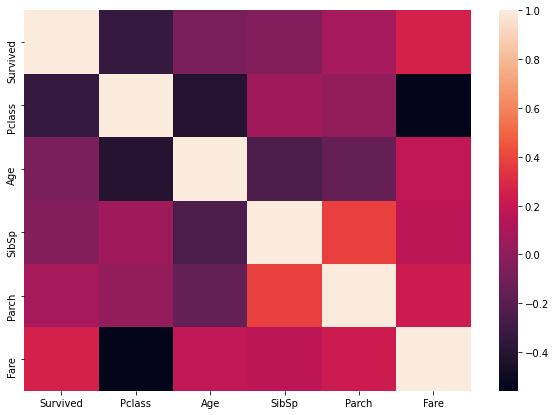

In [16]:
torr = titanic.corr()
plt.figure(figsize=(10,7))
sns.heatmap(torr)

##  Let's analyse each column individully and visualize accordingly

# 1. Survived

In [17]:
titanic.Survived.value_counts()

# Since test data does not contain this variable

0.0    549
1.0    342
Name: Survived, dtype: int64

In [18]:
round(((titanic[(titanic.Survived ==1)].SibSp != 0).sum()/342)*100,2)

# Out of 342 people who survived, almost 39% had siblings or their spouse on board

38.6

In [19]:
round(((titanic[(titanic.Survived ==0)].SibSp != 0).sum()/549)*100,2)

# Out of 549 people who died, around 28% had siblings or their spouse on board

27.5

In [20]:
round(((titanic[(titanic.Survived ==1)].Parch != 0).sum()/342)*100,2)

# Out of 342 people who survived, 32% had their parents or children on board

31.87

In [21]:
round(((titanic[(titanic.Survived ==0)].Parch != 0).sum()/549)*100,2)

# Out of 549 people who died, 19% had their parents or children on board

18.94

<AxesSubplot:xlabel='Survived', ylabel='count'>

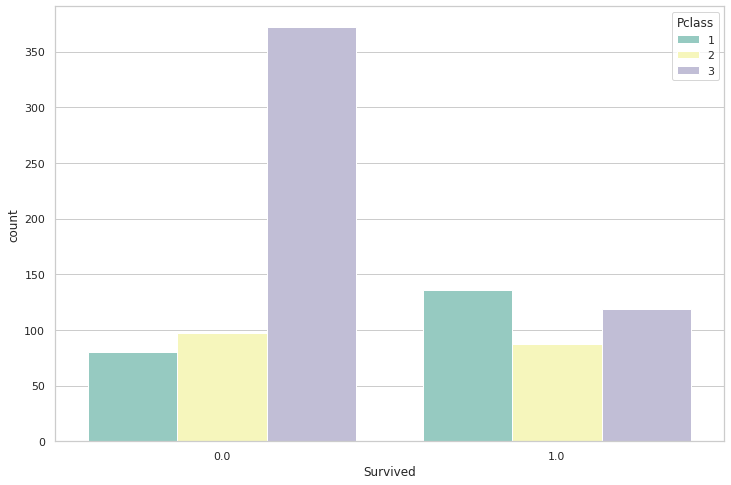

In [22]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.countplot(x=titanic.Survived, hue=titanic.Pclass, palette='Set3')

# When looking from class perspective, those who lost their lives belonged to class 3 and naturally those who got out alive belonged to class 1 mostly

<AxesSubplot:xlabel='Survived', ylabel='count'>

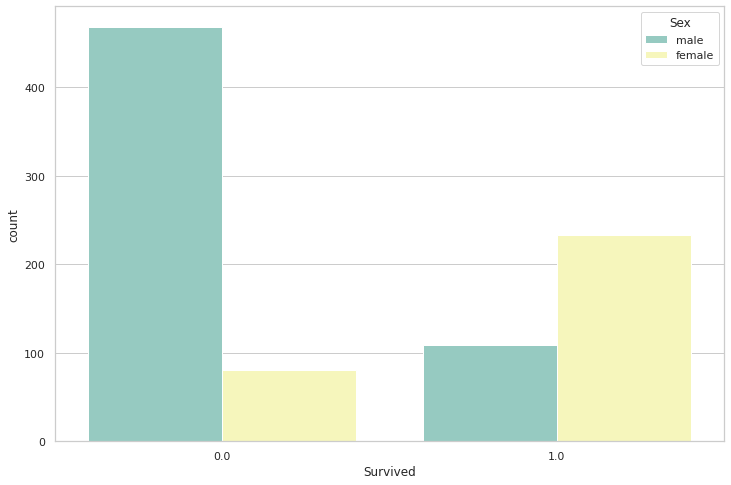

In [23]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.countplot(x=titanic.Survived, hue=titanic.Sex, palette='Set3')

# Majority who died were males

<AxesSubplot:xlabel='Survived', ylabel='Age'>

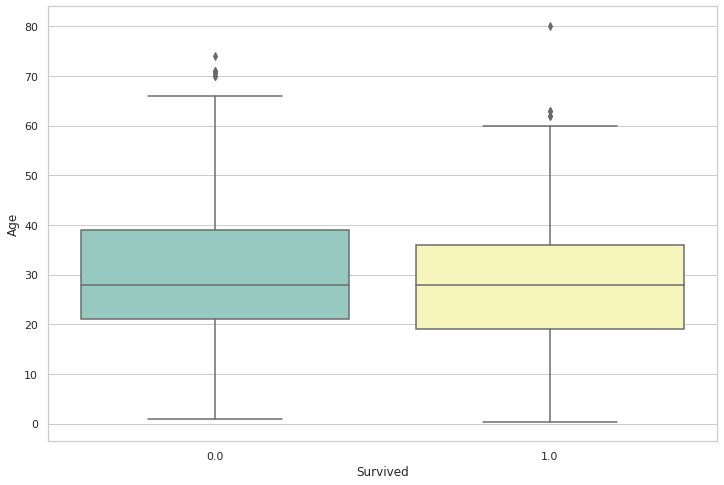

In [24]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.boxplot(x=titanic.Survived, y = titanic.Age, palette='Set3')

# There is no significant differences between ages of deceased and alive

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

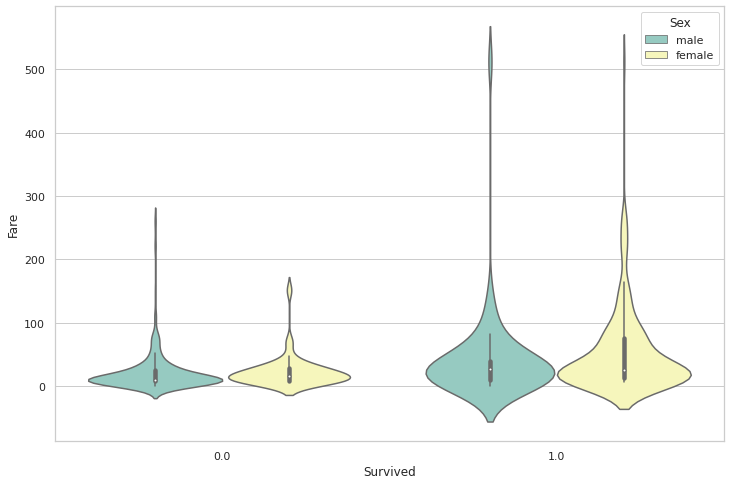

In [25]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=titanic.Survived, y = titanic.Fare, palette='Set3', hue=titanic.Sex)

# The plot indicates that the fare amount and corrsponding casualities are inversly proportional but the dataset mostly contains fare in the range 0-100

<AxesSubplot:xlabel='Survived', ylabel='count'>

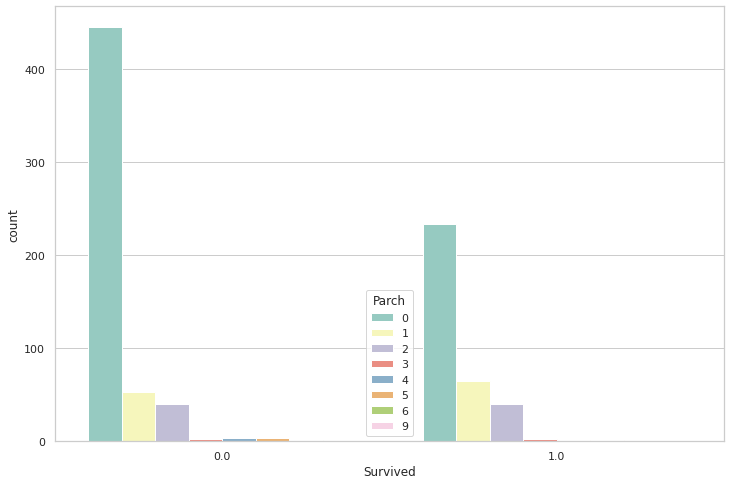

In [26]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.countplot(x=titanic.Survived, hue=titanic.Parch, palette='Set3')

<AxesSubplot:xlabel='Survived', ylabel='count'>

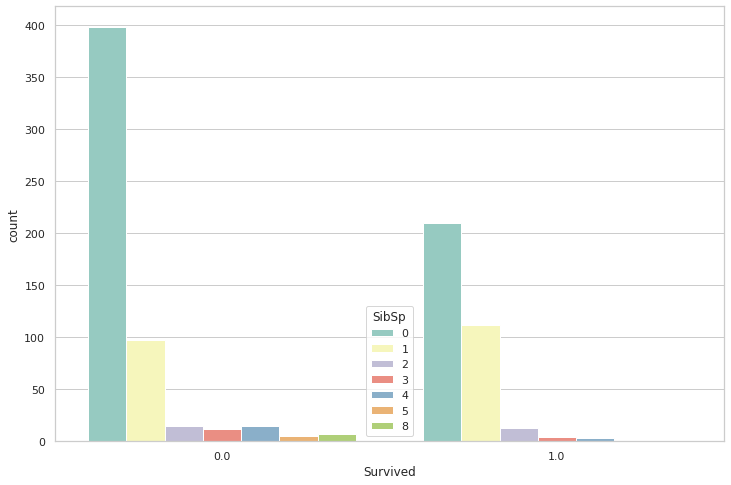

In [27]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.countplot(x=titanic.Survived, hue=titanic.SibSp, palette='Set3')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

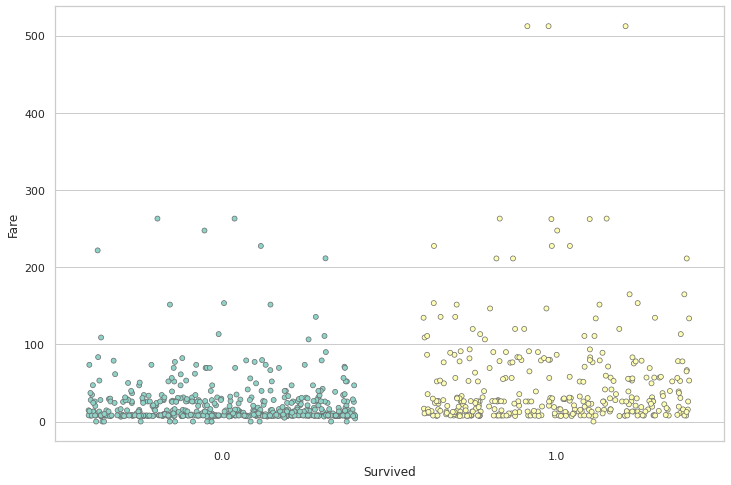

In [28]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.stripplot(x=titanic.Survived, y = titanic.Fare, palette='Set3',linewidth=0.7, jitter=0.4)


<AxesSubplot:xlabel='Survived', ylabel='count'>

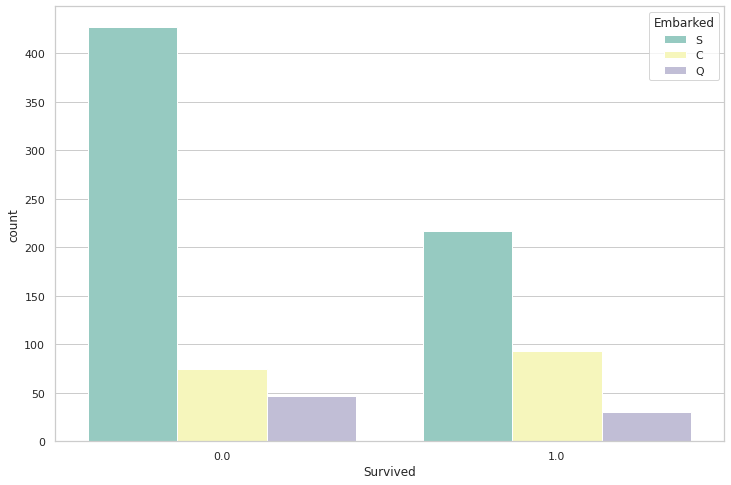

In [29]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.countplot(x=titanic.Survived, hue=titanic.Embarked, palette='Set3')

# People aboard were mostly from southampton and also the ones who lost most lives, which is intuitive!

# 2. Pclass - 
### It is defined as the deck number or the class number to which people were assigned and has total of 3 values i.e 1,2 and 3 

In [30]:
titanic.Pclass.value_counts()  # Majority are from 3rd class

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [31]:
titanic.Pclass.isnull().sum() # No missing points

0

In [32]:

titanic.groupby('Pclass').median()


,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,1.0,39.0,0,0,60.0000
2,0.0,29.0,0,0,15.0458
3,0.0,24.0,0,0,8.0500


<AxesSubplot:xlabel='Pclass', ylabel='count'>

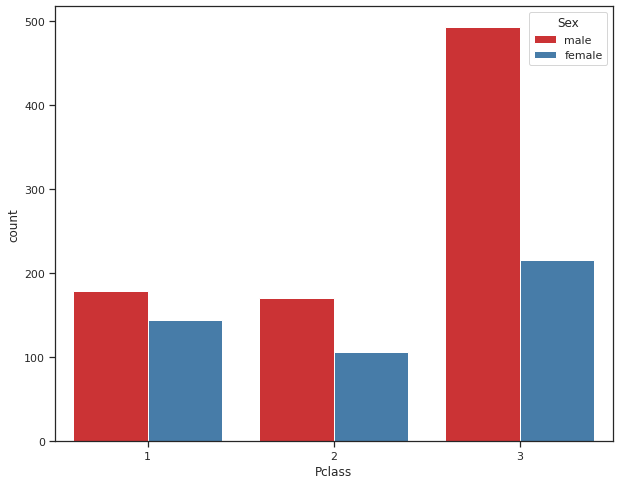

In [33]:
plt.figure(figsize=(10,8))
sns.set_theme(style='ticks')
sns.countplot(x=titanic.Pclass, hue=titanic.Sex, palette='Set1' )

# Most people belonged to 3rd class with male as the clear majority

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

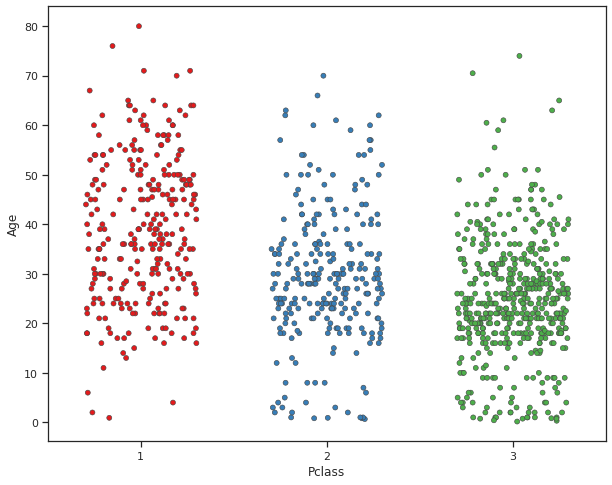

In [34]:
plt.figure(figsize=(10,8))
sns.set_theme(style='ticks')
sns.stripplot(x=titanic.Pclass, y=titanic.Age, palette='Set1', linewidth=0.6, jitter= 0.3)

# We have people of all age group similarly distributed across three classes with elederly people more in class 1

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

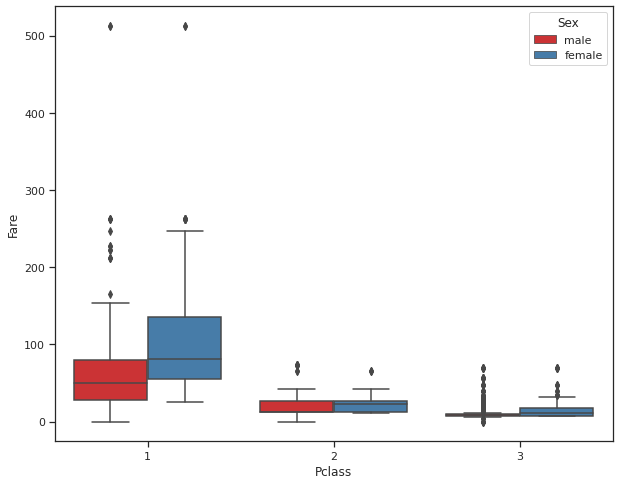

In [35]:
plt.figure(figsize=(10,8))
sns.set_theme(style='ticks')
sns.boxplot(x=titanic.Pclass, y = titanic.Fare,  palette='Set1', hue = titanic.Sex )

# There are some outliars in fare for people belonging to class 1 and females in that class had expensive tickets than males.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

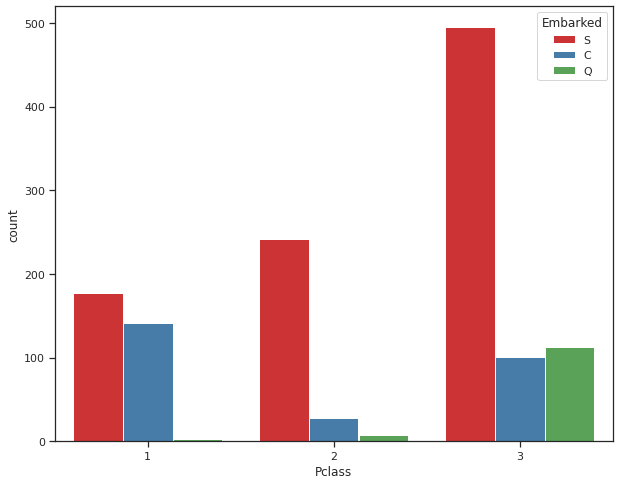

In [36]:
plt.figure(figsize=(10,8))
sns.set_theme(style='ticks')
sns.countplot(x=titanic.Pclass, hue=titanic.Embarked, palette='Set1')

# Southampton seems to be the most popular or the biggest yard according to the figure below

# 3. Name

In [37]:
titanic.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [38]:
titanic.Name.isnull().sum()

0

In [39]:
titanic.Name.map(lambda x : x.split(',')[0]).value_counts()[:15]

# We can also see names of people having same last name and can maybe infer that those are family members

Andersson    11
Sage         11
Asplund       8
Goodwin       8
Davies        7
Rice          6
Fortune       6
Johnson       6
Skoog         6
Smith         6
Carter        6
Brown         6
Panula        6
Ford          6
Kelly         5
Name: Name, dtype: int64

In [40]:
titanic[titanic.Name.map(lambda x : x.split(',')[0]) == titanic.Name.map(lambda x : x.split(',')[0]).value_counts().index[3]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
481,0.0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
684,0.0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S
1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S
1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S


In [41]:
titanic[((titanic.SibSp > 0) | (titanic.Parch >0)) & (titanic.Pclass == 3)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1281,NaN,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.0750,NaN,S
1284,NaN,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,S
1286,NaN,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,NaN,S


In [42]:
titanic.Name.describe()

count                 1309
unique                1307
top       Kelly, Mr. James
freq                     2
Name: Name, dtype: object

In [43]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 4. Sex

In [44]:
titanic.Sex.value_counts()

#Majority are males and no missing values

male      843
female    466
Name: Sex, dtype: int64

In [45]:
titanic.Sex.isnull().sum()

0

In [46]:
titanic[titanic.Sex == 'female'].Name.map(lambda x : x.split(',')[1].split('.')[0].strip()).value_counts()

# There are no gender specific titles that are wrongly labelled in the female category

Miss            260
Mrs             197
Mlle              2
Ms                2
Dona              1
Mme               1
Dr                1
Lady              1
the Countess      1
Name: Name, dtype: int64

In [47]:
titanic[titanic.Sex == 'male'].Name.map(lambda x : x.split(',')[1].split('.')[0].strip()).value_counts()

# There are no gender specific titles that are wrongly labelled in the male category

Mr          757
Master       61
Rev           8
Dr            7
Col           4
Major         2
Jonkheer      1
Sir           1
Don           1
Capt          1
Name: Name, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Age'>

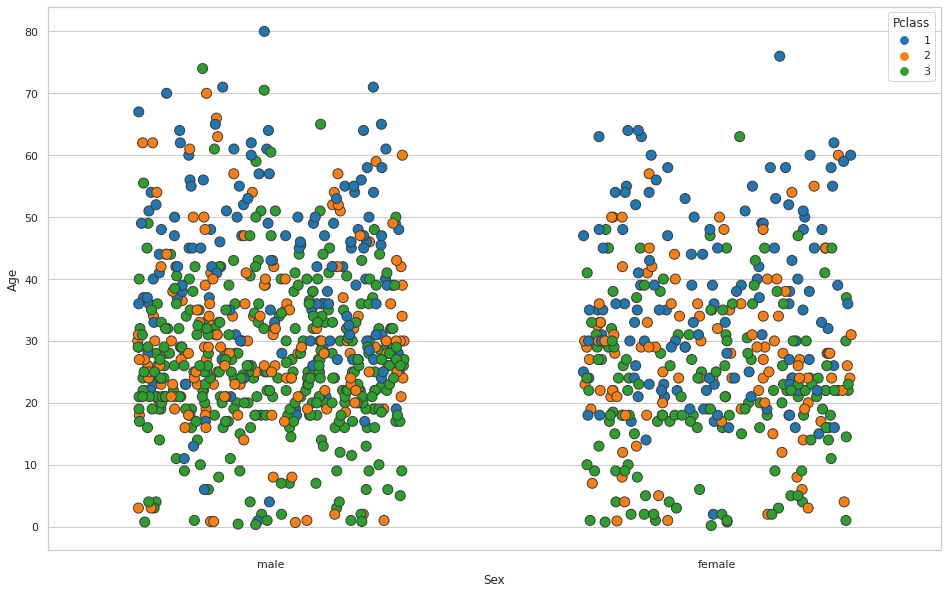

In [48]:
plt.figure(figsize=(16,10))
sns.set_theme(style='whitegrid')
sns.stripplot(y=titanic.Age, x = titanic.Sex, hue = titanic.Pclass, palette='tab10',jitter=0.3, linewidth=1,size=10)

## 4. Age

In [49]:
titanic.Age.describe()

# We have some missing values and it is much less than half, so we will impute missing values with a method

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [50]:
titanic.Age.value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
20.50     1
11.50     1
22.50     1
0.33      1
60.50     1
Name: Age, Length: 98, dtype: int64

<AxesSubplot:ylabel='Density'>

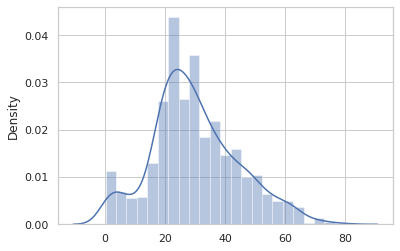

In [51]:
sns.distplot(x = titanic.Age)

In [52]:
titanic[titanic.Age < 1].groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,1.0,2.750,0.6475,1.5,1.500,21.710400
male,1.0,2.375,0.6975,0.5,1.375,32.480213


In [53]:
titanic[(titanic.Age < 18) & (titanic.Survived == 1)].groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,1.0,2.315789,9.592105,0.736842,0.868421,33.172261
male,1.0,2.260870,5.072609,0.826087,1.304348,37.641304


In [54]:
titanic.Age = titanic.Age.fillna(titanic.Age.median(),axis=0)

In [55]:
titanic.Age.describe()

count    1309.000000
mean       29.503186
std        12.905241
min         0.170000
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: Age, dtype: float64

In [56]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
age_bins = pd.cut(titanic.Age, bins=4, include_lowest=True, ordered=True, retbins=True)[0]

<AxesSubplot:xlabel='Age', ylabel='count'>

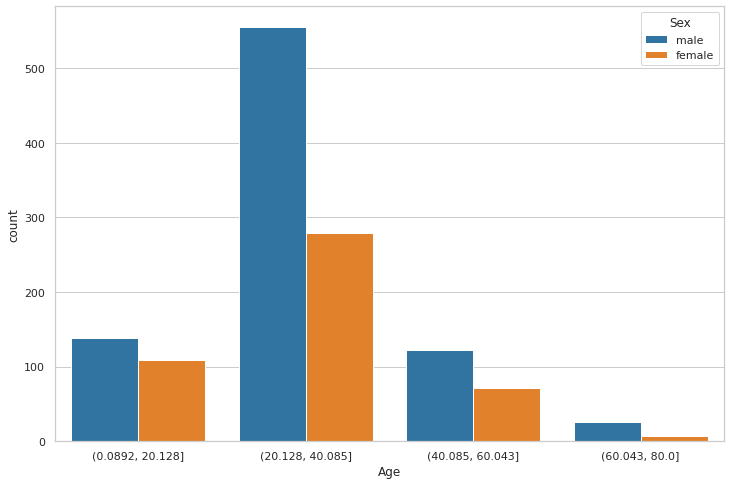

In [58]:
plt.figure(figsize=(12,8))
sns.countplot(x = age_bins, hue=titanic.Sex, palette='tab10')

# Majorly people onboard belonged to the age group of [16,33] in which males had a larger number

<AxesSubplot:xlabel='Age', ylabel='count'>

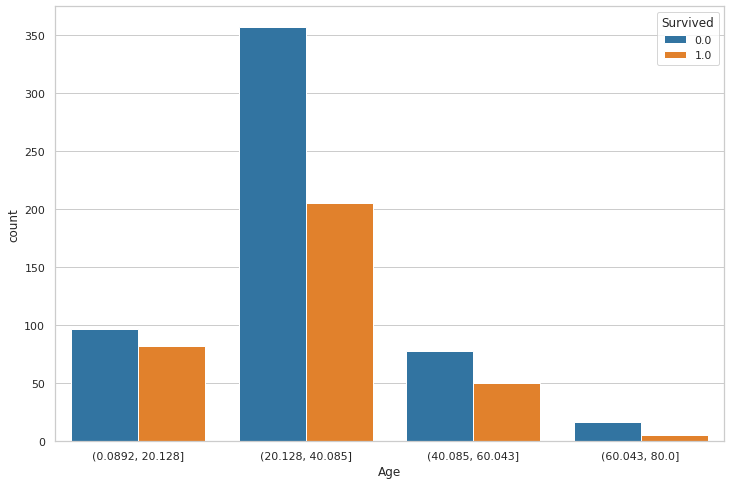

In [59]:
plt.figure(figsize=(12,8))
sns.countplot(x = age_bins, hue=titanic.Survived, palette='tab10')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

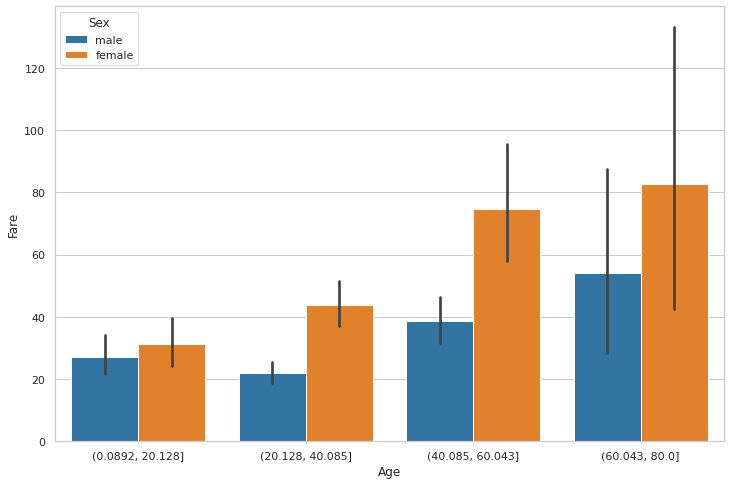

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(x = age_bins, y = titanic.Fare, hue=titanic.Sex, palette='tab10')

# Average fare for women was particularly high than the corresponding males in the same age group.

<AxesSubplot:xlabel='Age', ylabel='count'>

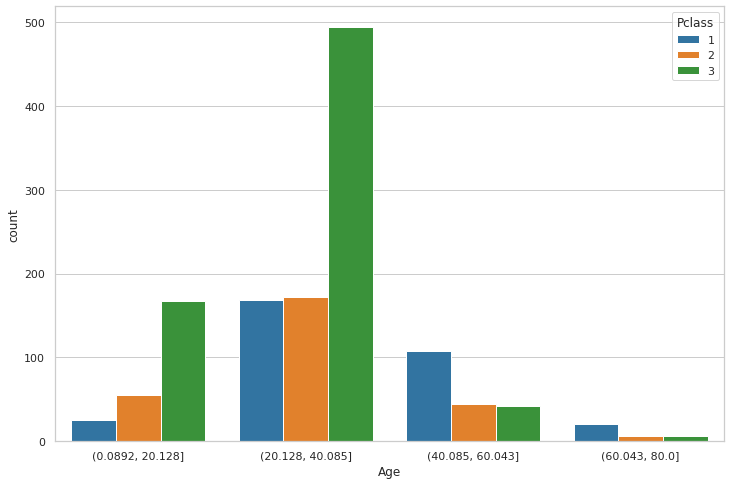

In [61]:
plt.figure(figsize=(12,8))
sns.countplot(x = age_bins, hue=titanic.Pclass, palette='tab10')

# we see that 3rd class had more younger people and better chances of surviving

<AxesSubplot:xlabel='Age', ylabel='count'>

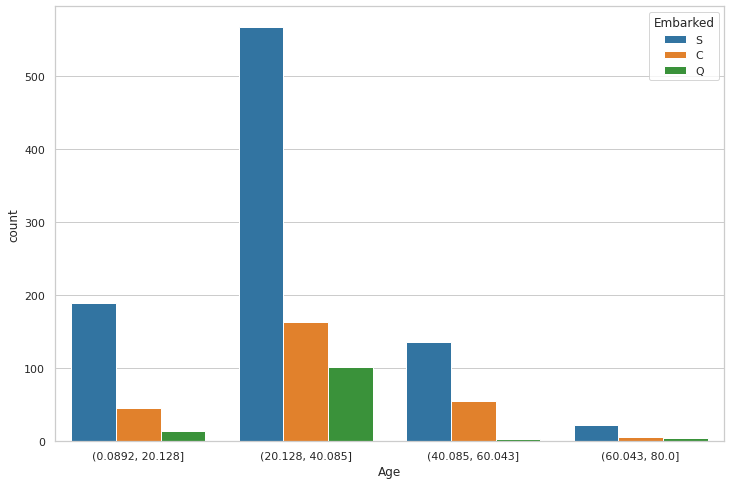

In [62]:
plt.figure(figsize=(12,8))
sns.countplot(x = age_bins, hue=titanic.Embarked, palette='tab10')

# 5. SibSp - It is defined as the number of siblings/spouse present of the person in consideration

In [63]:
titanic.SibSp.describe() # No missing values

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

In [64]:
titanic.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [65]:
titanic.groupby('SibSp').mean()

# We can see that those with less family members on board had more average survival rate

,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,
0,0.345395,2.351291,30.246251,0.181818,25.785406
1,0.535885,2.034483,30.684201,0.717868,48.711300
2,0.464286,2.333333,24.202381,0.571429,48.940576
3,0.250000,2.550000,18.650000,1.250000,71.332090
4,0.166667,3.000000,8.772727,1.545455,30.594318
5,0.000000,3.000000,10.166667,2.000000,46.900000
8,0.000000,3.000000,26.500000,2.000000,69.550000


In [66]:
titanic.loc[titanic.SibSp == 8]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
160,0.0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,NaN,S
181,0.0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,NaN,S
202,0.0,3,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,NaN,S
325,0.0,3,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,NaN,S
793,0.0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,NaN,S
847,0.0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,NaN,S
864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,NaN,S
1080,NaN,3,"Sage, Miss. Ada",female,28.0,8,2,CA. 2343,69.55,NaN,S
1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [67]:
titanic.loc[titanic.SibSp == 5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
481,0.0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
684,0.0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S
1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S


<AxesSubplot:xlabel='SibSp', ylabel='count'>

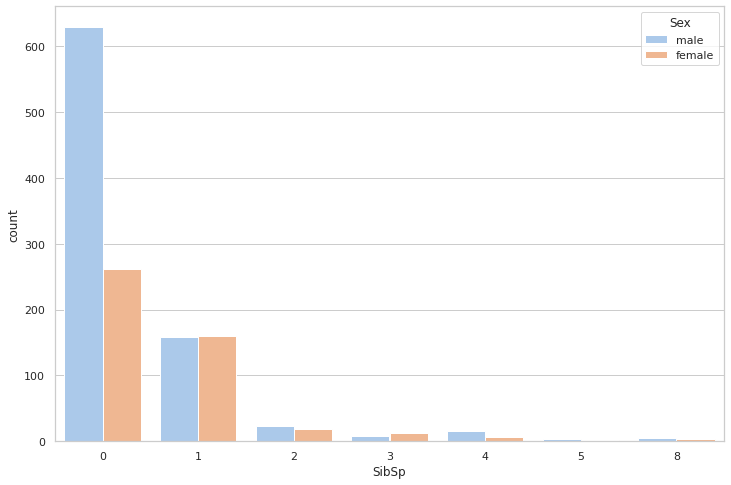

In [68]:
plt.figure(figsize=(12,8))
sns.countplot(x=titanic.SibSp, hue=titanic.Sex, palette='pastel')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

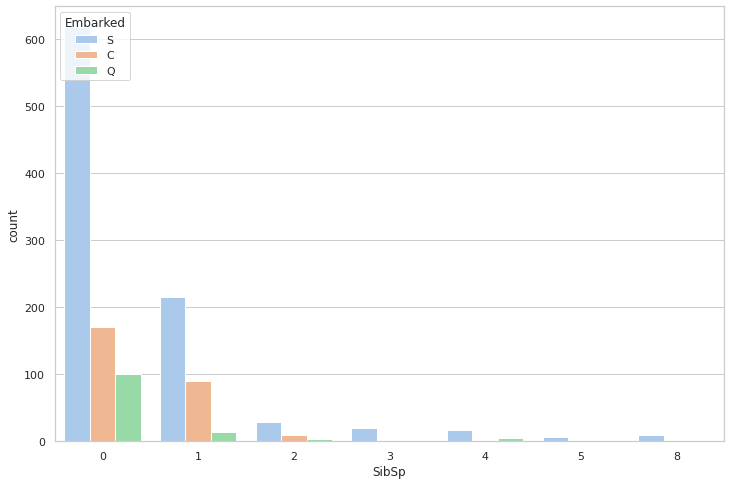

In [69]:
plt.figure(figsize=(12,8))
sns.countplot(x=titanic.SibSp, hue=titanic.Embarked, palette='pastel')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

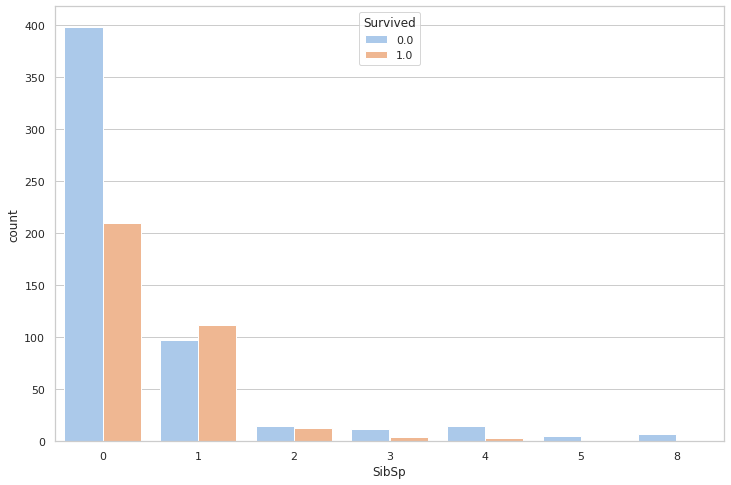

In [70]:
plt.figure(figsize=(12,8))
sns.countplot(x=titanic.SibSp, hue=titanic.Survived, palette='pastel')

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

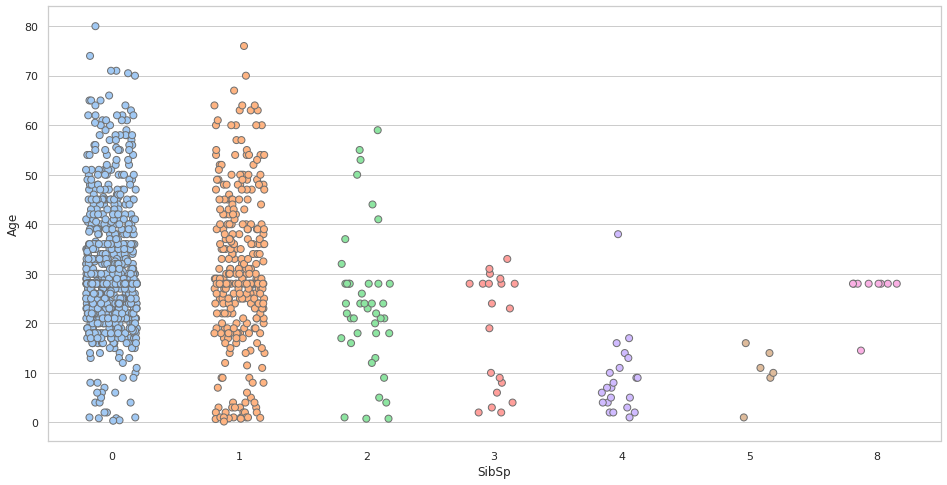

In [71]:
plt.figure(figsize=(16,8))
sns.stripplot(x=titanic.SibSp, y = titanic.Age ,  palette='pastel', size = 7, linewidth=1,jitter=0.2)

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

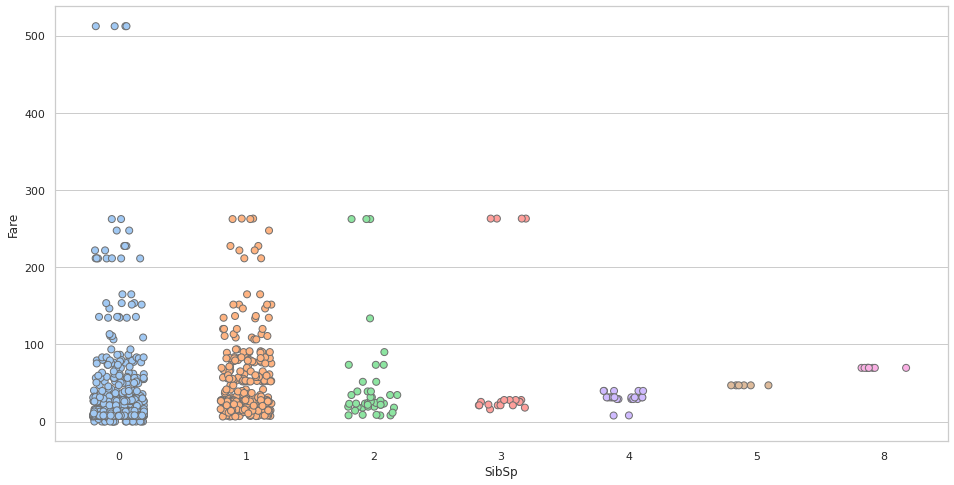

In [72]:
plt.figure(figsize=(16,8))
sns.stripplot(x=titanic.SibSp, y = titanic.Fare ,  palette='pastel', size = 7, linewidth=1,jitter=0.2)

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

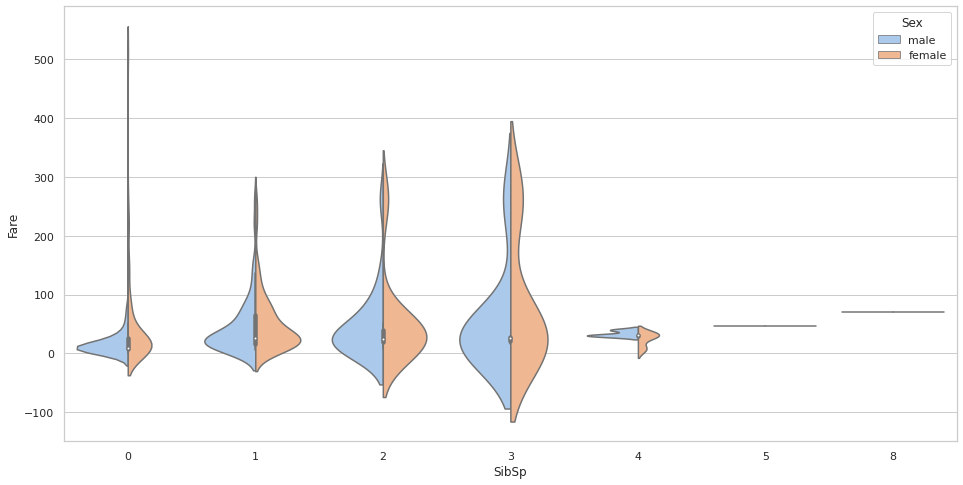

In [73]:
plt.figure(figsize=(16,8))
sns.violinplot(x=titanic.SibSp, y = titanic.Fare , hue=titanic.Sex, split=True, palette='pastel')

# 6. Parch - It represents number of Parents/Children present on Titanic at the time of the crash

In [74]:
titanic.Parch.describe() # No missing values

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Parch, dtype: float64

In [75]:
titanic.Parch.value_counts()

# We see that values correspoding to 3,4,5,6 Parch are very less. 
#If the sample ends up in the test set during splitting then the classifier would not have seen the category during training and will not be able to 
#encode it.
#In scikit-learn, there are two solutions to bypass this issue:

#1. list all the possible categories and provide it to the encoder via the keyword argument 'categories';
#2. use the parameter handle_unknown.

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: Parch, dtype: int64

In [76]:
titanic.loc[titanic.Parch == 6]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S


In [77]:
titanic.loc[titanic.Parch == 5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
26,1.0,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
611,0.0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
639,0.0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
886,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
1066,NaN,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.0,1,5,347077,31.3875,NaN,S


<AxesSubplot:xlabel='Parch', ylabel='count'>

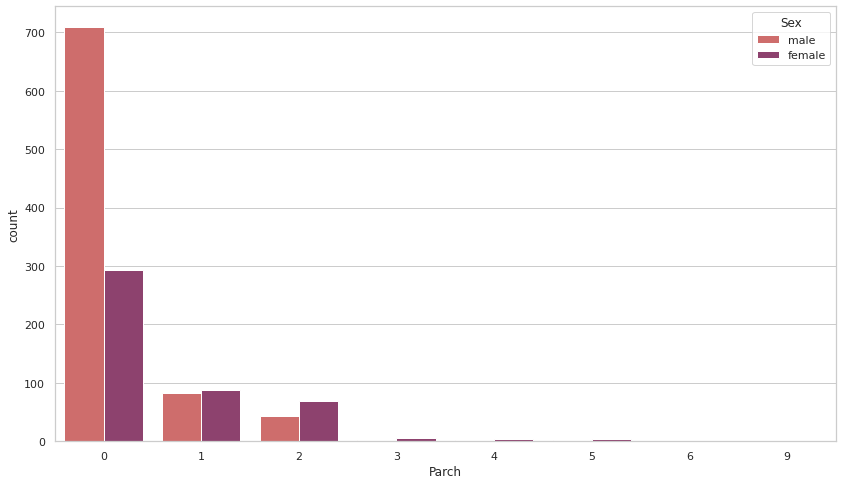

In [78]:
plt.figure(figsize=(14,8))
sns.countplot(x=titanic.Parch, hue=titanic.Sex, palette='flare')

<AxesSubplot:xlabel='Parch', ylabel='count'>

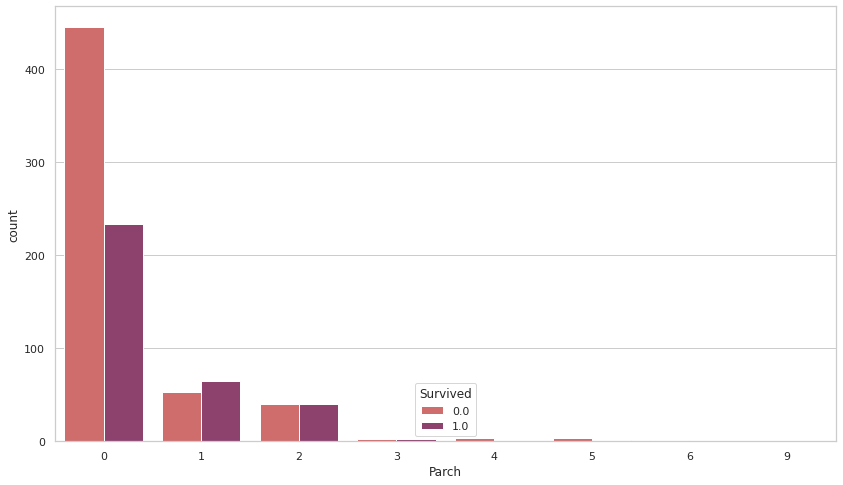

In [79]:
plt.figure(figsize=(14,8))
sns.countplot(x=titanic.Parch, hue=titanic.Survived, palette='flare')

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

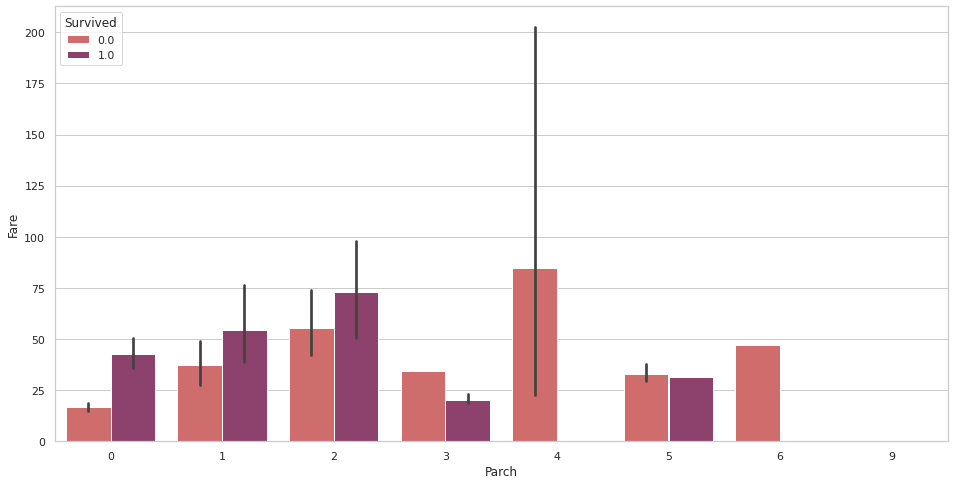

In [80]:
plt.figure(figsize=(16,8))
sns.barplot(x=titanic.Parch,y=titanic.Fare, hue=titanic.Survived, palette='flare')

# 7. Ticket

In [81]:
titanic.Ticket

PassengerId
1                A/5 21171
2                 PC 17599
3         STON/O2. 3101282
4                   113803
5                   373450
               ...        
1305             A.5. 3236
1306              PC 17758
1307    SOTON/O.Q. 3101262
1308                359309
1309                  2668
Name: Ticket, Length: 1309, dtype: object

In [82]:
titanic.Ticket.isnull().sum()

0

In [83]:
titanic.Ticket.value_counts()[:20]

CA. 2343        11
1601             8
CA 2144          8
347077           7
S.O.C. 14879     7
3101295          7
347082           7
PC 17608         7
113781           6
347088           6
19950            6
382652           6
220845           5
PC 17757         5
113503           5
4133             5
W./C. 6608       5
16966            5
349909           5
230136           4
Name: Ticket, dtype: int64

In [84]:
titanic[titanic.Ticket == titanic.Ticket.value_counts().index[3]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
26,1.0,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
183,0.0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S
234,1.0,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
262,1.0,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
1046,NaN,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,NaN,S
1066,NaN,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.0,1,5,347077,31.3875,NaN,S
1271,NaN,3,"Asplund, Master. Carl Edgar",male,5.0,4,2,347077,31.3875,NaN,S


# 8. Fare

In [85]:
titanic.Fare.describe() # One missing value

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [86]:
titanic.Fare.fillna(titanic.Fare.mean(),axis=0, inplace=True)

<AxesSubplot:xlabel='Fare', ylabel='Age'>

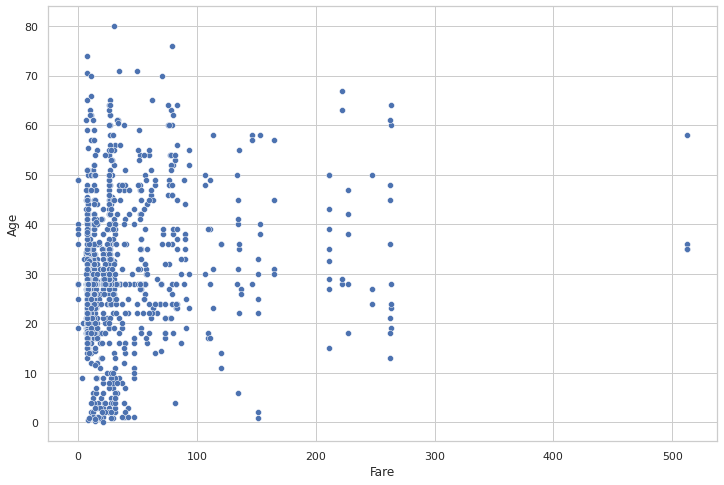

In [87]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=titanic.Fare, y = titanic.Age)

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

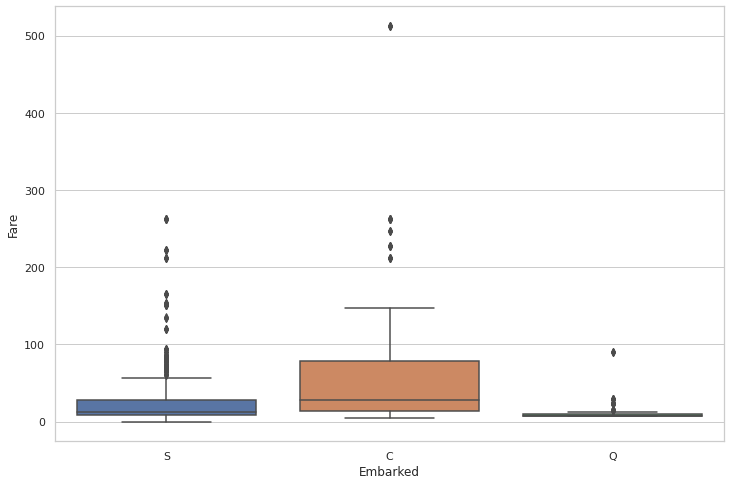

In [88]:
plt.figure(figsize=(12,8))
sns.boxplot(x=titanic.Embarked, y = titanic.Fare)

# 9. Cabin

In [89]:
titanic.Cabin.isnull().sum()

1014

In [90]:
titanic.Cabin.describe()

# Out of 1309 samples, we have 1014 absent which is more than 75% 
# Dropping cabin column

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [91]:
titanic.drop('Cabin', axis=1, inplace=True)

In [92]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 10. Embarked

In [93]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [94]:
titanic.Embarked.value_counts() 
# C = Cherbourg, Q = Queenstown, S = Southampton

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [95]:
titanic[titanic.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [96]:
titanic.Embarked.mode()

0    S
dtype: object

In [97]:
titanic.Embarked.dropna(axis=0,inplace=True)

In [98]:
titanic.groupby('Embarked').mean()
# Cherbourg had a large population of elite people

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.553571,1.851852,31.401556,0.400000,0.370370,62.336267
Q,0.389610,2.894309,28.256098,0.341463,0.113821,12.409012
S,0.336957,2.347921,29.065372,0.550328,0.426696,27.425253


In [99]:
titanic.groupby('Embarked').agg(['min']) # We see below that children died mostly, we should find out among the children, who had more chances

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
,min,min,min,min,min,min,min,min,min
Embarked,,,,,,,,,
C,0.0,1,"Abelson, Mr. Samuel",female,0.42,0,0,110813,4.0125
Q,0.0,1,"Barry, Miss. Julia",female,2.00,0,0,12460,6.7500
S,0.0,1,"Abbing, Mr. Anthony",female,0.17,0,0,110152,0.0000


In [100]:
titanic.groupby('Embarked').agg(['max'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
,max,max,max,max,max,max,max,max,max
Embarked,,,,,,,,,
C,1.0,3,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",male,71.0,2,3,SC/Paris 2163,512.3292
Q,1.0,3,"Tobin, Mr. Roger",male,70.5,4,5,AQ/4 3130,90.0000
S,1.0,3,"van Melkebeke, Mr. Philemon",male,80.0,8,9,WE/P 5735,263.0000


# Feature Engineering

In [101]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [102]:
# Since all the siblings/spouses and parents/children constutute one family, we can have the total family members as a feature

titanic['Family_members'] = titanic['SibSp'] + titanic['Parch'] 

In [103]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_members
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [104]:
titanic['Title'] = titanic.Name.map(lambda x : (x.split(',')[1].split('.')[0].strip()))

In [105]:
titanic.Title

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
         ...  
1305        Mr
1306      Dona
1307        Mr
1308        Mr
1309    Master
Name: Title, Length: 1309, dtype: object

In [106]:
titanic.Title.value_counts()

# Commonly occuring titles are Mr, Miss, Mrs, Master and Dr

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Ms                2
Mlle              2
Capt              1
Jonkheer          1
the Countess      1
Dona              1
Sir               1
Don               1
Mme               1
Lady              1
Name: Title, dtype: int64

#### Let's define those obscure titles or titles native to some country that may not be known to common public 

##### Rev - (as the title of a priest) Reverend
##### Col - Colonel
##### Mlle - Mademoiselle (in French)
##### Dona - a woman or girlfriend (in Italian)
##### Jonkheer - Honorific of nobility is literally translated as "young lord" or "young lady" in Low Countries
##### Mme - Madame (is a traditional alternative for an unmarried woman in France)
##### Don - Don, abbreviated as D., is an honorific prefix primarily used in Spain and the former Spanish Empire, Croatia, Italy, and Portugal and its former colonies.

In [107]:
# Let's check if these titles belong to male or female category in order to classify them properly
# titanic.loc[titanic.Title == 'Rev'] --> All male so adding to Mr 
# titanic.loc[titanic.Title == 'Col'] --> All male so adding to Mr
# titanic.loc[titanic.Title == 'Mlle'] --> Adding to Miss
# titanic.loc[titanic.Title == 'Dona'] --> Adding to Mrs
# titanic.loc[titanic.Title == 'Jonkheer'] --> Adding to Mr
# titanic.loc[titanic.Title == 'Mme'] --> Adding to Miss
# titanic.loc[titanic.Title == 'Don'] --> Adding to Mr
# titanic.loc[titanic.Title == 'the Countess'] --> Adding to Mrs
# titanic.loc[titanic.Title == 'Lady'] --> Adding to Mrs

In [108]:
# We can combine rare occurings of titles under one title also beacuse it may interfere with our model if one observation occurs in test data and not in train
# data which will lead to hampered accuracy.

titanic.Title = titanic.Title.replace(['Sir','Capt','Don','Col','Jonkheer','Rev','Major'], 'Mr')

titanic.Title = titanic.Title.replace(['Dona','the Countess','Lady'], 'Mrs')

titanic.Title = titanic.Title.replace(['Ms','Mlle','Mme'], 'Miss')

titanic.Title.value_counts()

# Now we have substantial samples for balanced distribution across train and test sets

Mr        775
Miss      265
Mrs       200
Master     61
Dr          8
Name: Title, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='Name_length'>

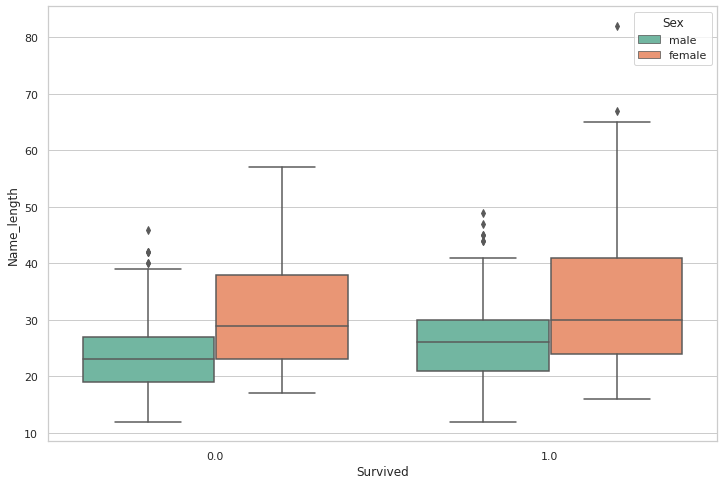

In [109]:
titanic['Name_length'] = titanic.Name.map(lambda x : len(x)).values

plt.figure(figsize=(12,8))
sns.color_palette('Set2')
sns.boxplot(y= titanic.Name_length, x = titanic.Survived, hue = titanic.Sex, palette='Set2')

# Oh yeah, we can see that there is a slight relationship between people's name and their survival chances.


In [110]:
# We can atleast extract numerical values of the ticket to know more info about it

titanic.Ticket.map(lambda x : x.split(" ")[-1].strip()).value_counts()


2343      11
1601       8
2144       8
347082     7
347077     7
          ..
347743     1
349212     1
350050     1
330844     1
349227     1
Name: Ticket, Length: 924, dtype: int64

In [111]:
titanic.Ticket = titanic.Ticket.map(lambda x : x.split(" ")[-1].strip())

In [112]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_members,Title,Name_length
PassengerId,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,21171,7.2500,S,1,Mr,23
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,1,Mrs,51
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3101282,7.9250,S,0,Miss,22
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Mrs,44
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr,24


In [113]:
titanic.drop('Name',axis=1,inplace=True)

In [114]:
titanic.isnull().sum()

Survived          418
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            2
Family_members      0
Title               0
Name_length         0
dtype: int64

In [115]:
titanic[titanic.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_members,Title,Name_length
PassengerId,,,,,,,,,,,,
62,1.0,1,female,38.0,0,0,113572,80.0,NaN,0,Miss,19
830,1.0,1,female,62.0,0,0,113572,80.0,NaN,0,Mrs,41


In [116]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_members,Title,Name_length
PassengerId,,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,21171,7.2500,S,1,Mr,23
2,1.0,1,female,38.0,1,0,17599,71.2833,C,1,Mrs,51
3,1.0,3,female,26.0,0,0,3101282,7.9250,S,0,Miss,22
4,1.0,1,female,35.0,1,0,113803,53.1000,S,1,Mrs,44
5,0.0,3,male,35.0,0,0,373450,8.0500,S,0,Mr,24


In [117]:
from sklearn.compose import make_column_selector as selector

In [118]:
column_selector = selector(dtype_include=object)
category = column_selector(titanic)
category

['Sex', 'Ticket', 'Embarked', 'Title']

In [119]:
data_categorical = titanic[]

SyntaxError: invalid syntax (<ipython-input-119-cfc18082d901>, line 1)

In [120]:
data_categorical.dropna(axis=0,inplace=True)

NameError: name 'data_categorical' is not defined

In [121]:
from sklearn.preprocessing import OneHotEncoder

In [122]:
encoder = OneHotEncoder()

In [123]:
encoder.fit(data_categorical)

NameError: name 'data_categorical' is not defined

In [124]:
encoder.transform(data_categorical)

NameError: name 'data_categorical' is not defined

In [125]:
data_categorical

NameError: name 'data_categorical' is not defined

In [126]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_members,Title,Name_length
PassengerId,,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,21171,7.2500,S,1,Mr,23
2,1.0,1,female,38.0,1,0,17599,71.2833,C,1,Mrs,51
3,1.0,3,female,26.0,0,0,3101282,7.9250,S,0,Miss,22
4,1.0,1,female,35.0,1,0,113803,53.1000,S,1,Mrs,44
5,0.0,3,male,35.0,0,0,373450,8.0500,S,0,Mr,24
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,male,28.0,0,0,3236,8.0500,S,0,Mr,18
1306,NaN,1,female,39.0,0,0,17758,108.9000,C,0,Mrs,28
1307,NaN,3,male,38.5,0,0,3101262,7.2500,S,0,Mr,28
